In [16]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,InputLayer
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical
import random as rn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


In [2]:
image_directory='train/'

daisy=os.listdir(image_directory+ 'daisy/')
dandelion=os.listdir(image_directory+ 'dandelion/')
rose = os.listdir(image_directory+ 'rose/')
sunflower = os.listdir(image_directory+ 'sunflower/')
tulip = os.listdir(image_directory+ 'tulip/')
dataset=[]
label=[]

In [3]:
INPUT_SIZE=64


for i , image_name in enumerate(daisy):
    if(image_name.split('.')[-1]=='jpg'):
        image=cv2.imread(image_directory+ 'daisy/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

for i , image_name in enumerate(rose):
    if(image_name.split('.')[-1]=='jpg'):
        image=cv2.imread(image_directory+ 'rose/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

for i , image_name in enumerate(tulip):
    if(image_name.split('.')[-1]=='jpg'):
        image=cv2.imread(image_directory+ 'tulip/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(2)

for i , image_name in enumerate(dandelion):
    if(image_name.split('.')[-1]=='jpg'):
        image=cv2.imread(image_directory+ 'dandelion/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(3)

for i , image_name in enumerate(sunflower):
    if(image_name.split('.')[-1]=='jpg'):
        image=cv2.imread(image_directory+ 'sunflower/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(4)

In [23]:
dataset=np.array(dataset)
label=np.array(label)

x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)


x_train=normalize(x_train, axis=1)
x_test=normalize(x_test, axis=1)



print(x_train.shape)
y_train=to_categorical(y_train , num_classes=5)
y_test=to_categorical(y_test , num_classes=5)

(2196, 64, 64, 3)


In [24]:
model=Sequential()
model.add(InputLayer(input_shape=(INPUT_SIZE,INPUT_SIZE,3)))
model.add(Conv2D(32, (3,3), ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


model.fit(x_train, y_train, 
batch_size=16, 
verbose=1, epochs=16, 
validation_data=(x_test, y_test),
shuffle=False)

Epoch 1/16
138/138 [==============================] - 7s 41ms/step - loss: 1.5973 - accuracy: 0.2372 - val_loss: 1.5654 - val_accuracy: 0.2691
Epoch 2/16
138/138 [==============================] - 6s 40ms/step - loss: 1.4271 - accuracy: 0.3757 - val_loss: 1.2474 - val_accuracy: 0.4327
Epoch 3/16
138/138 [==============================] - 5s 38ms/step - loss: 1.2698 - accuracy: 0.4549 - val_loss: 1.2728 - val_accuracy: 0.4673
Epoch 4/16
138/138 [==============================] - 5s 37ms/step - loss: 1.2344 - accuracy: 0.4913 - val_loss: 1.1819 - val_accuracy: 0.5255
Epoch 5/16
138/138 [==============================] - 5s 36ms/step - loss: 1.1678 - accuracy: 0.5187 - val_loss: 1.2067 - val_accuracy: 0.5091
Epoch 6/16
138/138 [==============================] - 5s 36ms/step - loss: 1.1167 - accuracy: 0.5560 - val_loss: 1.0548 - val_accuracy: 0.5745
Epoch 7/16
138/138 [==============================] - 5s 37ms/step - loss: 1.0591 - accuracy: 0.5747 - val_loss: 1.0606 - val_accuracy: 0.5764

In [25]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

18/18 [==============================] - 1s 21ms/step


In [27]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score


pred=(pred>0.01) .astype (int)
y_true=np.reshape (y_test, [-1])
y_pred=np.reshape (pred, [-1])
#Evaluation index
accuracy=accuracy_score (y_true, y_pred)
precision=precision_score (y_true, y_pred)
recall=recall_score (y_true, y_pred, average="binary")
f1score=f1_score (y_true, y_pred, average="binary")

[Text(0.5, 1.0, 'Đánh giá độ chính xác CNN')]

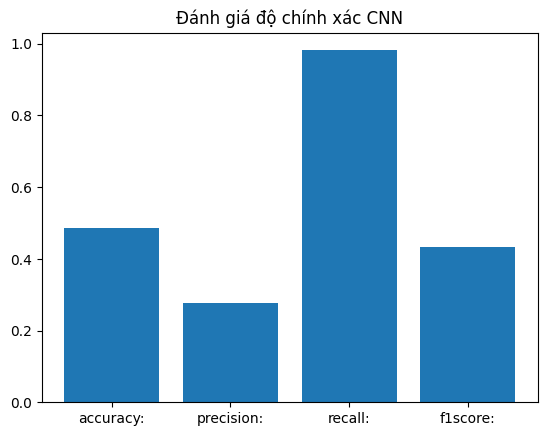

In [28]:
evaluation = {
    "accuracy:" :accuracy,
    "precision:" :precision,
    "recall:": recall,
    "f1score:": f1score
}
fig, ax = plt.subplots()
ax.bar(evaluation.keys(), evaluation.values())
ax.set(title="Đánh giá độ chính xác CNN")